#### Step 1 - Importing Required Libraries and Algorithms

In [306]:
# Importing Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import pickle
import joblib

# Importing Algorithms
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Importing Evaluation Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#### Step 2 - Problem Statement

#### Step 3 - Data Gathering

In [307]:
# Importing all the data provided by Client
features=pd.read_csv('features.csv')
stores=pd.read_csv('stores.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [308]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [309]:
stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [310]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [311]:
test

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [312]:
# Grouping the data based on store number
train=train.groupby(['Store','Date'])['Weekly_Sales'].sum()
train=train.reset_index()
train

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68
...,...,...,...
6430,45,2012-09-28,713173.95
6431,45,2012-10-05,733455.07
6432,45,2012-10-12,734464.36
6433,45,2012-10-19,718125.53


In [313]:
# Merging 2 DataFrames i.e. train and features into single DataFrame data
data=pd.merge(train,features,on=['Store','Date'],how='inner')
data

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
6431,45,2012-10-05,733455.07,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
6432,45,2012-10-12,734464.36,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
6433,45,2012-10-19,718125.53,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [314]:
# Merging 2 DataFrames i.e. data and stores into single DataFrame df
df=pd.merge(data,stores,on=['Store'],how='inner')
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,B,118221
6431,45,2012-10-05,733455.07,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,B,118221
6432,45,2012-10-12,734464.36,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,B,118221
6433,45,2012-10-19,718125.53,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,B,118221


<AxesSubplot: xlabel='Type', ylabel='count'>

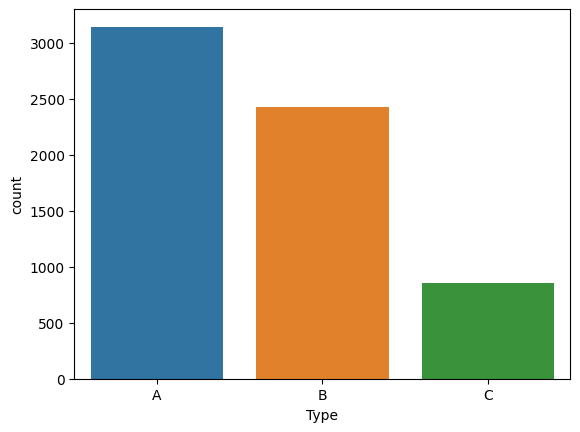

In [315]:
# Checking count of stores based on there Type
store_count=sns.countplot(x='Type',data=df)
plt.savefig('store_count.png')
store_count

<AxesSubplot: xlabel='IsHoliday', ylabel='count'>

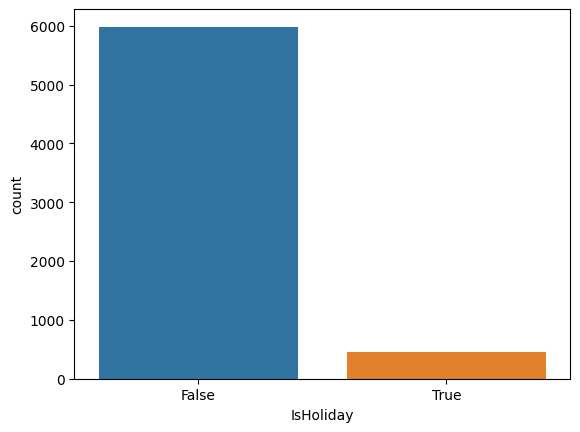

In [316]:
# Checking count of holidays
holiday_count=sns.countplot(x='IsHoliday',data=df)
plt.savefig('holiday_count.png')
holiday_count

#### Step 4 - Data Processing/Feature Engineering

In [317]:
# Checking count of null values in each column
df.isnull().sum()

Store              0
Date               0
Weekly_Sales       0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
Type               0
Size               0
dtype: int64

In [318]:
# Since null value count is very high in column MarkDown1, MarkDown2, MarkDown3, MarkDown4, MarkDown5 dropping those columns from df
df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [319]:
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,False,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,True,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,False,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,False,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,False,B,118221
6431,45,2012-10-05,733455.07,64.89,3.985,192.170412,8.667,False,B,118221
6432,45,2012-10-12,734464.36,54.47,4.000,192.327265,8.667,False,B,118221
6433,45,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,False,B,118221


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   IsHoliday     6435 non-null   bool   
 8   Type          6435 non-null   object 
 9   Size          6435 non-null   int64  
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 509.0+ KB


In [321]:
# Converting the df into required format using Form_df.py file 
import Form_DF as form_df

df=form_df.Frame_Converter(df)

In [322]:
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Holiday,Year,Month,Day,WeakOfYear
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,1,151315,0,2010,2,5,5
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1,151315,1,2010,2,12,6
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,1,151315,0,2010,2,19,7
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,1,151315,0,2010,2,26,8
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,1,151315,0,2010,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,2,118221,0,2012,9,28,39
6431,45,2012-10-05,733455.07,64.89,3.985,192.170412,8.667,2,118221,0,2012,10,5,40
6432,45,2012-10-12,734464.36,54.47,4.000,192.327265,8.667,2,118221,0,2012,10,12,41
6433,45,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,2,118221,0,2012,10,19,42


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Temperature   6435 non-null   float64       
 4   Fuel_Price    6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
 7   Type          6435 non-null   int64         
 8   Size          6435 non-null   int64         
 9   Holiday       6435 non-null   int64         
 10  Year          6435 non-null   int64         
 11  Month         6435 non-null   int64         
 12  Day           6435 non-null   int64         
 13  WeakOfYear    6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(7)
memory usage: 735.2 KB


#### Step 5 - Exploratory Data Analysis

In [324]:
# Correlating the tempratue and weekly sales
temp_sale = px.histogram(df, x='Temperature', y ='Weekly_Sales',color='Holiday')
temp_sale.show()

In [325]:
# Correlating the unemployment and weekly sales
unemp_sale = px.histogram(df, x='Unemployment', y ='Weekly_Sales')
unemp_sale.update_layout(bargap=0.2)
unemp_sale.show()

In [326]:
# How Unemployment is affecting sales
unemp_fig = px.histogram(df, x='Unemployment', y ='Weekly_Sales', marginal='box', title = 'How Unemployment affect sales', template='simple_white')
unemp_fig.show()

In [327]:
# Sales with respect to month
month_sale=px.histogram(df,x='Month',y='Weekly_Sales')
month_sale.update_layout(bargap=0.2)
month_sale.show()

In [328]:
# Sales with respect to weak of year
weak_sale=px.histogram(df,x='WeakOfYear',y='Weekly_Sales',color='Holiday')
weak_sale.update_layout(bargap=0.2)
weak_sale.show()

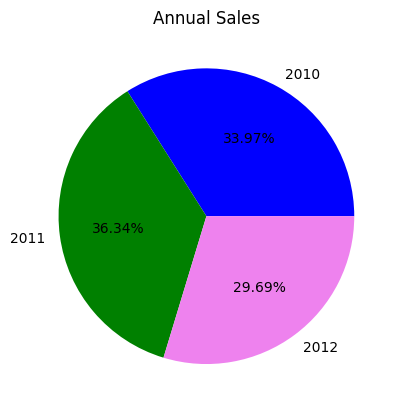

In [329]:
# Sales with repect to year
plt.pie(df.groupby('Year')['Weekly_Sales'].sum(),labels=df['Year'].unique(),normalize=True,autopct='%1.2f%%',colors=['blue','green','violet'])
plt.title('Annual Sales')
plt.savefig('year_vs_sales.png')

#### Step 6 - Splitting the Data 

In [330]:
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Holiday,Year,Month,Day,WeakOfYear
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,1,151315,0,2010,2,5,5
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1,151315,1,2010,2,12,6
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,1,151315,0,2010,2,19,7
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,1,151315,0,2010,2,26,8
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,1,151315,0,2010,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,2,118221,0,2012,9,28,39
6431,45,2012-10-05,733455.07,64.89,3.985,192.170412,8.667,2,118221,0,2012,10,5,40
6432,45,2012-10-12,734464.36,54.47,4.000,192.327265,8.667,2,118221,0,2012,10,12,41
6433,45,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,2,118221,0,2012,10,19,42


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Temperature   6435 non-null   float64       
 4   Fuel_Price    6435 non-null   float64       
 5   CPI           6435 non-null   float64       
 6   Unemployment  6435 non-null   float64       
 7   Type          6435 non-null   int64         
 8   Size          6435 non-null   int64         
 9   Holiday       6435 non-null   int64         
 10  Year          6435 non-null   int64         
 11  Month         6435 non-null   int64         
 12  Day           6435 non-null   int64         
 13  WeakOfYear    6435 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(5), int64(7)
memory usage: 735.2 KB


In [332]:
x=df.drop(['Weekly_Sales','Date','Year'],axis=1)
y=df['Weekly_Sales']

In [333]:
x

,Store,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Holiday,Month,Day,WeakOfYear
0,1,42.31,2.572,211.096358,8.106,1,151315,0,2,5,5
1,1,38.51,2.548,211.242170,8.106,1,151315,1,2,12,6
2,1,39.93,2.514,211.289143,8.106,1,151315,0,2,19,7
3,1,46.63,2.561,211.319643,8.106,1,151315,0,2,26,8
4,1,46.50,2.625,211.350143,8.106,1,151315,0,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,64.88,3.997,192.013558,8.684,2,118221,0,9,28,39
6431,45,64.89,3.985,192.170412,8.667,2,118221,0,10,5,40
6432,45,54.47,4.000,192.327265,8.667,2,118221,0,10,12,41
6433,45,56.47,3.969,192.330854,8.667,2,118221,0,10,19,42


In [334]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [335]:
# One Hot Encoding using transformer
# transformer=ColumnTransformer(transformers=[('trf',OneHotEncoder(sparse=False,drop='first'),['Store'])],remainder='passthrough')
# x_train= transformer.fit_transform(x_train)
# x_test = transformer.transform(x_test)

In [336]:
# Scaling of data for better fitting and less time consumption
# rob_scaler = RobustScaler()
# rob_scaler.fit(x_train)
# x_train = rob_scaler.transform(x_train)
# x_test = rob_scaler.transform(x_test)

#### Step 7 - Model Building

In [337]:
def Mod(model,x_train,y_train,x_test,y_test):
    built_model=model()
    built_model.fit(x_train,y_train)
    y_predicted=built_model.predict(x_test)

    print(built_model)
    print(f'MAE of model is : {mean_absolute_error(y_test,y_predicted)}')
    print(f'MSE of model is : {mean_squared_error(y_test,y_predicted)}')
    print(f'R2 score of model is :{r2_score(y_test,y_predicted)}')

##### 7.1 Linear Regression

In [338]:
Mod(LinearRegression,x_train,y_train,x_test,y_test)

LinearRegression()
MAE of model is : 232857.90237601672
MSE of model is : 97717806715.38312
R2 score of model is :0.6966741513457018


In [339]:
Lr_Model=LinearRegression()
Lr_Model.fit(x_train,y_train)

LinearRegression()

#### 7.2 Lasso Regression

In [340]:
Mod(Lasso,x_train,y_train,x_test,y_test)

Lasso()
MAE of model is : 232844.2943266361
MSE of model is : 97704844119.47191
R2 score of model is :0.6967143885403103


c:\Users\swati\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.327e+14, tolerance: 1.635e+11



#### 7.3 Ridge Regression

In [341]:
Mod(Ridge,x_train,y_train,x_test,y_test)

Ridge()
MAE of model is : 232859.87122528753
MSE of model is : 97714525385.94731
R2 score of model is :0.6966843369205655


##### 7.4 Random Forest

##### 7.4.1 Basic Model

In [342]:
Mod(RandomForestRegressor,x_train,y_train,x_test,y_test)

RandomForestRegressor()
MAE of model is : 48718.90647016314
MSE of model is : 7786069792.496209
R2 score of model is :0.9758312603723358


In [343]:
Rf_Model=RandomForestRegressor()
Rf_Model.fit(x_train,y_train)

RandomForestRegressor()

#### Step 8 - Exporting the Model using Pickle and joblib

In [344]:
with open('Lr_Model.pickle','wb') as file:
    pickle.dump(Lr_Model,file)

In [345]:
with open('Rf_Model.pkl','wb') as file1:
    pickle.dump(Lr_Model,file1)

#### Step 9 - Analysis

In [346]:
df

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Holiday,Year,Month,Day,WeakOfYear
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,1,151315,0,2010,2,5,5
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,1,151315,1,2010,2,12,6
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,1,151315,0,2010,2,19,7
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,1,151315,0,2010,2,26,8
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,1,151315,0,2010,3,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,64.88,3.997,192.013558,8.684,2,118221,0,2012,9,28,39
6431,45,2012-10-05,733455.07,64.89,3.985,192.170412,8.667,2,118221,0,2012,10,5,40
6432,45,2012-10-12,734464.36,54.47,4.000,192.327265,8.667,2,118221,0,2012,10,12,41
6433,45,2012-10-19,718125.53,56.47,3.969,192.330854,8.667,2,118221,0,2012,10,19,42


In [347]:
def analysis(df):
    # When does maximum sale took place 
    max_sales=df.iloc[np.where(df.Weekly_Sales==df['Weekly_Sales'].max())]
    max_sales
    print(f'Maximum sale took place on date {list(max_sales["Date"])} with sales of {list(max_sales["Weekly_Sales"])} in month {list(max_sales["Month"])}')
    print('_'*100)

    # How many times stores had sales greater than average sales
    count=list(df[df['Weekly_Sales']>df['Weekly_Sales'].mean()].groupby('Store')['Weekly_Sales'].count())
    # print(f'{count} times Store 1 has sales greater than 1600000')
    # print('_'*100)

    # What is the maximum weekly sale of each store?
    weekly_sale=list(df.groupby('Store')['Weekly_Sales'].max())
    # max_sale=pd.DataFrame(weekly_sale,columns=['Max_Weekly_Sale'])
    # display(max_sale)
    # print('_'*100)

    # Find the maximum cpi of each store.
    cpi=list(df.groupby('Store')['CPI'].max())
    # cpi_sale=pd.DataFrame(cpi,columns=['Max_CPI'])
    # display(cpi_sale)
    # print('_'*100)

    # Calculate average size of each store
    avg_size=list(df.groupby('Store')['Size'].mean())
    # avg_size=pd.DataFrame(avg_size,columns=['Avg_Size'])
    # display(avg_size)
    # print('_'*100)

    ana=pd.DataFrame({'Max_Weekly_Sale':weekly_sale,'Max_CPI':cpi,'Average_Size':avg_size})
    display(ana)

In [348]:
analysis(df)

Maximum sale took place on date [Timestamp('2010-12-24 00:00:00')] with sales of [3818686.45] in month [12]
____________________________________________________________________________________________________


,Max_Weekly_Sale,Max_CPI,Average_Size
0,2387950.20,223.444251,151315.0
1,3436007.68,223.078337,202307.0
2,605990.41,226.987364,37392.0
3,3676388.98,131.193097,205863.0
4,507900.07,224.037814,34875.0
5,2727575.18,225.068625,202505.0
6,1059715.27,199.219532,70713.0
7,1511641.09,227.036936,155078.0
8,905324.68,227.232807,125833.0
9,3749057.69,131.193097,126512.0
